Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [47]:
# pip install opencv-python

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

DATADIR = "/Users/ShaikhAbdulSami/Documents/AIC/DLAssignments/flowers"
CATEGORIES = ["daisy", "dandelion", "rose", "sunflower", "tulip"]
IMG_SIZE = 180 #256 #150


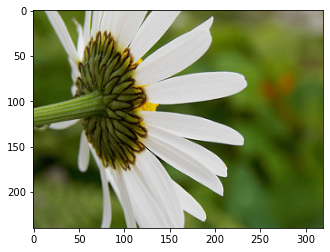

In [49]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #making path to folder
    for img in os.listdir(path):
        #img_array1 = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #get full image path & make it GRAY
        #plt.imshow(img_array1, cmap="gray")
        
        img_array1 = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) #get full image path & make it GRAY
        plt.imshow(cv2.cvtColor(img_array1, cv2.COLOR_BGR2RGB))
       
        plt.show()
        break
    break

In [50]:
img_array1.shape

(240, 320, 3)

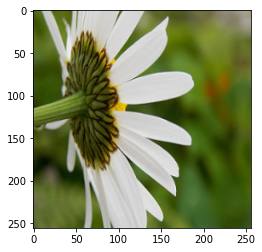

In [51]:
img_array2 = cv2.resize(img_array1, (256, 256))
plt.imshow(cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB))


plt.show()

In [52]:
full_ds = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #making path to folder
        label_img = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                #raw_img = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #get full image path & make it GRAY
                raw_img = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) #get full image path & make it COLOR
                resized_img = cv2.resize(raw_img, (IMG_SIZE, IMG_SIZE))
                full_ds.append([resized_img, label_img])
            except Exception as e:
                print("Corupted Images: ",os.path.join(DATADIR,category,img))
                
            
        
create_training_data()

Corupted Images:  /Users/ShaikhAbdulSami/Documents/AIC/DLAssignments/flowers/dandelion/flickr.py
Corupted Images:  /Users/ShaikhAbdulSami/Documents/AIC/DLAssignments/flowers/dandelion/flickr.pyc
Corupted Images:  /Users/ShaikhAbdulSami/Documents/AIC/DLAssignments/flowers/dandelion/run_me.py


In [53]:
np.random.shuffle(full_ds) #Shuffle data

In [54]:
#Data preprocessing for feeding into the model¶
x = []
y = []

for features, labels in full_ds:
    x.append(features)
    y.append(labels)
    
#x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)      # 1 is for Grey image
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)      # 3 is for color image

In [55]:
#Split Data (60 train + 40 test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

#Split Data (80 train + 20 Val)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [56]:
print('Train Data:')
print('Data: {} -- Label: {}'.format(len(x_train),len(y_train)))
print('Sample Data: {} -- Sample Label: {}'.format(x_train[0], y_train[0]))

# print(' ')
# print('Val Data:')
# print('Data: {} -- Label: {}'.format(len(x_val),len(y_val)))
# print('Val Data: {} -- Val Label: {}'.format(x_val[0], y_val[0]))

print(' ')
print('Test Data:')
print('Data: {} -- Label: {}'.format(len(x_test),len(y_test)))
print('Sample Data: {} -- Sample Label: {}'.format(x_test[0], y_test[0]))

Train Data:
Data: 2593 -- Label: 2593
Sample Data: [[[202 188 182]
  [202 188 182]
  [202 188 182]
  ...
  [190 171 163]
  [188 169 161]
  [188 169 161]]

 [[203 189 183]
  [203 189 183]
  [202 188 182]
  ...
  [190 171 163]
  [189 170 162]
  [189 170 162]]

 [[203 189 183]
  [203 189 183]
  [203 189 183]
  ...
  [189 170 162]
  [189 170 162]
  [190 171 163]]

 ...

 [[  8  40  36]
  [ 30  49  46]
  [ 72  79  79]
  ...
  [136 101  77]
  [155 117  86]
  [158 119  87]]

 [[ 12  45  41]
  [ 26  44  43]
  [ 52  59  61]
  ...
  [147 110  83]
  [157 118  87]
  [156 119  89]]

 [[ 36  53  52]
  [ 57  70  71]
  [ 56  70  73]
  ...
  [154 116  87]
  [157 119  87]
  [157 120  91]]] -- Sample Label: 3
 
Test Data:
Data: 1730 -- Label: 1730
Sample Data: [[[148 174 191]
  [163 172 192]
  [152 175 195]
  ...
  [193 243 233]
  [190 242 232]
  [190 241 232]]

 [[154 175 193]
  [144 176 192]
  [158 171 192]
  ...
  [190 240 230]
  [188 239 229]
  [188 239 229]]

 [[157 175 194]
  [151 178 195]
  [154 1

In [57]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [58]:
x_train = x_train/255
x_test = x_test/255


print('Train Data:')
print('Data: {} -- Label: {}'.format(len(x_train),len(y_train)))
print('Sample Data: {} -- Sample Label: {}'.format(x_train[0], y_train[0]))


Train Data:
Data: 2593 -- Label: 2593
Sample Data: [[[0.79215686 0.7372549  0.71372549]
  [0.79215686 0.7372549  0.71372549]
  [0.79215686 0.7372549  0.71372549]
  ...
  [0.74509804 0.67058824 0.63921569]
  [0.7372549  0.6627451  0.63137255]
  [0.7372549  0.6627451  0.63137255]]

 [[0.79607843 0.74117647 0.71764706]
  [0.79607843 0.74117647 0.71764706]
  [0.79215686 0.7372549  0.71372549]
  ...
  [0.74509804 0.67058824 0.63921569]
  [0.74117647 0.66666667 0.63529412]
  [0.74117647 0.66666667 0.63529412]]

 [[0.79607843 0.74117647 0.71764706]
  [0.79607843 0.74117647 0.71764706]
  [0.79607843 0.74117647 0.71764706]
  ...
  [0.74117647 0.66666667 0.63529412]
  [0.74117647 0.66666667 0.63529412]
  [0.74509804 0.67058824 0.63921569]]

 ...

 [[0.03137255 0.15686275 0.14117647]
  [0.11764706 0.19215686 0.18039216]
  [0.28235294 0.30980392 0.30980392]
  ...
  [0.53333333 0.39607843 0.30196078]
  [0.60784314 0.45882353 0.3372549 ]
  [0.61960784 0.46666667 0.34117647]]

 [[0.04705882 0.1764705

In [76]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

Network = models.Sequential()
#Network.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
Network.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))) # for color
Network.add(layers.MaxPooling2D((2, 2)))
#Network.add(layers.Dropout(0.5))
Network.add(layers.Conv2D(8, (3, 3), activation='relu'))
Network.add(layers.MaxPooling2D((2, 2)))
#Network.add(layers.Dropout(0.5))
Network.add(layers.Conv2D(8, (3, 3), activation='relu'))
Network.add(layers.MaxPooling2D((2, 2)))
#Network.add(layers.Dropout(0.5))
Network.add(layers.Flatten())
Network.add(layers.Dropout(0.5))
Network.add(layers.Dense(8, activation='relu'))
Network.add(layers.Dense(5, activation='softmax'))

# Compilation
Network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [77]:
history = Network.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
82/82 [==============================] - 24s 281ms/step - loss: 1.5947 - accuracy: 0.2649
Epoch 2/100
82/82 [==============================] - 23s 275ms/step - loss: 1.3702 - accuracy: 0.4025
Epoch 3/100
82/82 [==============================] - 22s 267ms/step - loss: 1.1987 - accuracy: 0.4955
Epoch 4/100
82/82 [==============================] - 22s 267ms/step - loss: 1.1104 - accuracy: 0.5509
Epoch 5/100
82/82 [==============================] - 23s 280ms/step - loss: 1.0197 - accuracy: 0.6001
Epoch 6/100
82/82 [==============================] - 22s 268ms/step - loss: 1.0176 - accuracy: 0.5982
Epoch 7/100
82/82 [==============================] - 22s 264ms/step - loss: 0.9733 - accuracy: 0.6187
Epoch 8/100
82/82 [==============================] - 22s 263ms/step - loss: 0.9050 - accuracy: 0.6507
Epoch 9/100
82/82 [==============================] - 21s 261ms/step - loss: 0.8963 - accuracy: 0.6491
Epoch 10/100
82/82 [==============================] - 22s 262ms/step - loss: 0.923

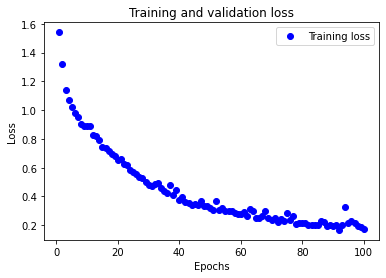

In [80]:
import matplotlib.pyplot as plt

loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


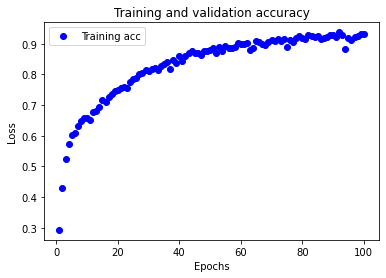

In [81]:
plt.clf()
acc = history.history['accuracy']


plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [82]:
train_loss,train_acc=Network.evaluate(x_train, y_train)
print("Accuracy: ",train_acc,"\nTrain Loss Value:",train_loss)

82/82 [==============================] - 9s 99ms/step - loss: 0.0452 - accuracy: 0.9907
Accuracy:  0.9907442927360535 
Train Loss Value: 0.04524185135960579


In [84]:
#Check Model performance of Test Data
test_loss,test_acc=Network.evaluate(x_test, y_test)
print("Accuracy: ",test_acc,"\nTest Loss Value:",test_loss)

55/55 [==============================] - 5s 88ms/step - loss: 1.6223 - accuracy: 0.6272
Accuracy:  0.6271676421165466 
Test Loss Value: 1.622314691543579


In [85]:
predictions = Network.predict(x_test)
# show the inputs and predicted outputs
# for i in range(10):
#     print("Predicted Value: {} -- Original Value: {}"
#           .format(CATEGORIES[predictions[i]], CATEGORIES[np.argmax(y_label[i])]))


In [86]:
predictions[2].sum()

1.0

In [87]:
predictions[2].argmax()

1